# Data Preparation & Exploration

**Objective:** Load and preprocess a real-world corpus of unstructured text documents.

## Dataset loading

This dataset contains the subset of ArXiv papers with the "cs.LG" tag to indicate the paper is about Machine Learning.

The core dataset is filtered from the [full ArXiv dataset](https://www.kaggle.com/datasets/Cornell-University/arxiv) hosted on Kaggle. The original dataset contains roughly 2 million papers. This dataset contains roughly 100,000 papers following the category filtering.

The link to the dataset on HuggingFace: https://huggingface.co/datasets/CShorten/ML-ArXiv-Papers.

In [13]:
!pip install datasets pandas nltk spacy --quiet
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 74.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [35]:
from datasets import load_dataset

ds = load_dataset("CShorten/ML-ArXiv-Papers")

In [36]:
df = ds["train"].to_pandas()

In [37]:
df.head()

,Unnamed: 0.1,Unnamed: 0,title,abstract
0,0,0.0,Learning from compressed observations,The problem of statistical learning is to co...
1,1,1.0,Sensor Networks with Random Links: Topology De...,"In a sensor network, in practice, the commun..."
2,2,2.0,The on-line shortest path problem under partia...,The on-line shortest path problem is conside...
3,3,3.0,A neural network approach to ordinal regression,Ordinal regression is an important type of l...
4,4,4.0,Parametric Learning and Monte Carlo Optimization,This paper uncovers and explores the close r...


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117592 entries, 0 to 117591
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0.1  117592 non-null  int64  
 1   Unnamed: 0    112592 non-null  float64
 2   title         117592 non-null  object 
 3   abstract      117592 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.6+ MB


In [39]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
display(df.head())

,title,abstract
0,Learning from compressed observations,The problem of statistical learning is to co...
1,Sensor Networks with Random Links: Topology De...,"In a sensor network, in practice, the commun..."
2,The on-line shortest path problem under partia...,The on-line shortest path problem is conside...
3,A neural network approach to ordinal regression,Ordinal regression is an important type of l...
4,Parametric Learning and Monte Carlo Optimization,This paper uncovers and explores the close r...


In [40]:
df_sample = df.sample(n=1000, random_state=42)
display(df_sample.head())

,title,abstract
107644,SVD Perspectives for Augmenting DeepONet Flexi...,Deep operator networks (DeepONets) are power...
33964,Towards robust audio spoofing detection: a det...,"Automatic speaker verification, like every o..."
3137,Guided Random Forest in the RRF Package,Random Forest (RF) is a powerful supervised ...
33168,Best Arm Identification in Generalized Linear ...,"Motivated by drug design, we consider the be..."
20962,Conditional Affordance Learning for Driving in...,Most existing approaches to autonomous drivi...


> Because the dataset is large, a random sample of 1,000 research papers was selected for this assessment.

## Data Preprocessing

In [41]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")

text_column = 'abstract'

def preprocess_text(doc):
    """
    Preprocess a single text string:
    1. Lowercase
    2. Tokenize
    3. Remove stopwords + punctuation/symbols
    4. Lemmatize using spaCy
    """

    # 1. Lowercasing
    doc = doc.lower()

    # 2. Tokenization
    tokens = word_tokenize(doc)

    # 3. Remove stopwords & punctuation/symbols
    filtered_tokens = [
        word for word in tokens
        if word not in stop_words and re.match(r'^[\w-]+$', word)
    ]

    # 4. Lemmatization with spaCy
    spacy_doc = nlp(" ".join(filtered_tokens))
    lemmatized_tokens = [
        token.lemma_ for token in spacy_doc
        if not token.is_punct and not token.is_space
    ]

    # Join back into a single string
    cleaned_text = " ".join(lemmatized_tokens)

    return cleaned_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
df_sample['processed_abstract'] = df_sample[text_column].apply(preprocess_text)
print(df_sample[['abstract', 'processed_abstract']].head(3))

                                                 abstract  \
107644    Deep operator networks (DeepONets) are power...   
33964     Automatic speaker verification, like every o...   
3137      Random Forest (RF) is a powerful supervised ...   

                                       processed_abstract  
107644  deep operator network deeponet powerful archit...  
33964   automatic speaker verification like every biom...  
3137    random forest rf powerful supervise learner po...  


In [43]:
df_sample.head()

,title,abstract,processed_abstract
107644,SVD Perspectives for Augmenting DeepONet Flexi...,Deep operator networks (DeepONets) are power...,deep operator network deeponet powerful archit...
33964,Towards robust audio spoofing detection: a det...,"Automatic speaker verification, like every o...",automatic speaker verification like every biom...
3137,Guided Random Forest in the RRF Package,Random Forest (RF) is a powerful supervised ...,random forest rf powerful supervise learner po...
33168,Best Arm Identification in Generalized Linear ...,"Motivated by drug design, we consider the be...",motivated drug design consider good arm identi...
20962,Conditional Affordance Learning for Driving in...,Most existing approaches to autonomous drivi...,exist approach autonomous driving fall one two...


## Exploratory Data Analysis

In [24]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import nltk
import spacy

### Distribution of Abstracts Lengths

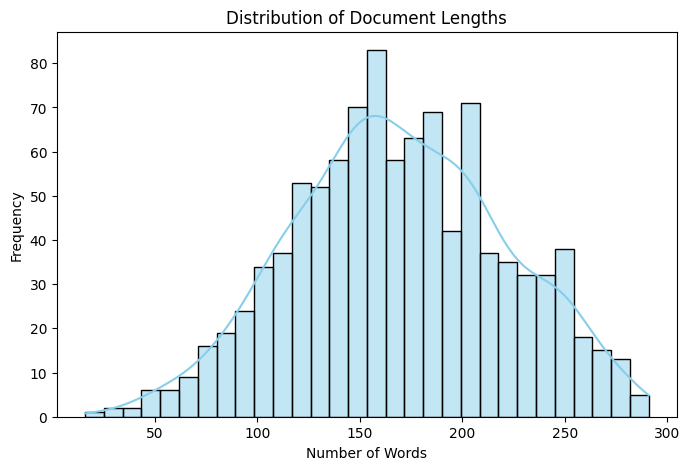

In [32]:
df_sample['abstract_length'] = df_sample['abstract'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(df_sample['abstract_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Document Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

### Distribution of Processed Abstracts Lengths

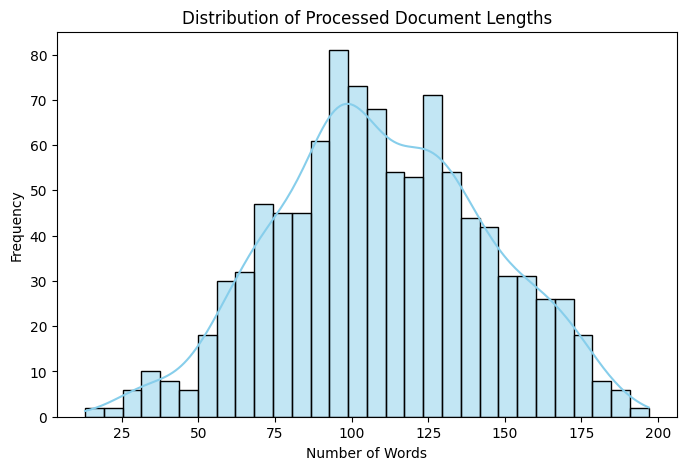

In [33]:
df_sample['processed_abstract_length'] = df_sample['processed_abstract'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(df_sample['processed_abstract_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Processed Document Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

### Top 20 Most Frequent Words

/tmp/ipython-input-3289443405.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


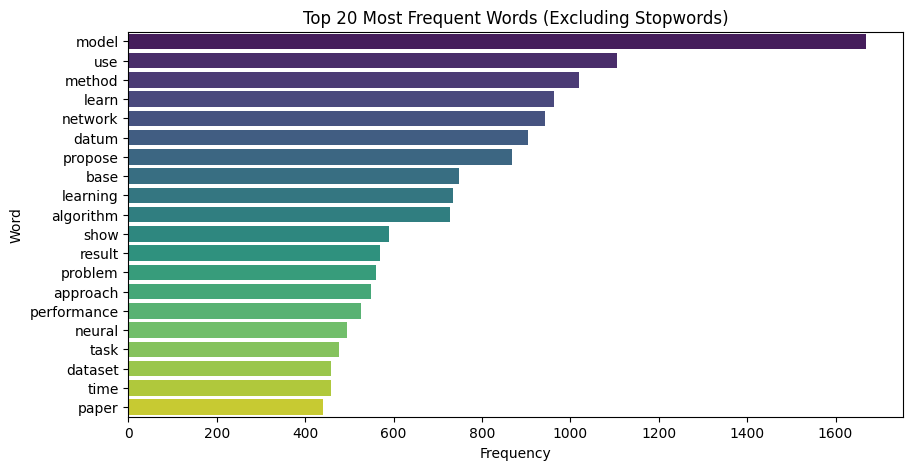

In [34]:
all_words = [
    word
    for doc in df_sample['processed_abstract']
    for word in doc.split()
]

word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)

words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title("Top 20 Most Frequent Words (Excluding Stopwords)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

### Named Entity Frequency

/tmp/ipython-input-3451798649.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(labels), palette='magma')


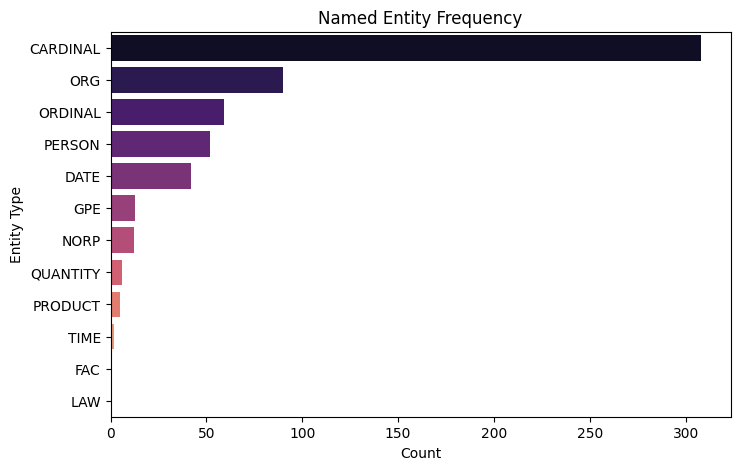

In [46]:
sample_texts = df_sample['processed_abstract'][:200]  # limit to avoid slow NER

entities = []

# This is to process many sample texts at once
for doc in nlp.pipe(sample_texts, batch_size=20):
    entities.extend([ent.label_ for ent in doc.ents])

entity_freq = Counter(entities).most_common()

if entity_freq:
    labels, counts = zip(*entity_freq)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(counts), y=list(labels), palette='magma')
    plt.title("Named Entity Frequency")
    plt.xlabel("Count")
    plt.ylabel("Entity Type")
    plt.show()
else:
    print("No entities found in sample.")

## Dataset exportation

In [47]:
df_sample.to_csv('sample_df.csv', index=False)